# Linear Regression

## Affine function
An affine function (also called a linear function1) of a vector x takes a weighted sum of each
input and adds a constant. For example, for D=3 inputs x = [x1 x2 x3],a general (scalar)affine function is:
    $$f(x;w,b)=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+b=w^{T}x+b$$
where **w** is the weights, which can be used to represent the effect brought by the input features, which are represented by **x** in this equation, and the **b** is the bias( or offset), which can be used to ensure the performance of a model.

## Least Square Error function
The least square error function is a very classic model, which is widely used in the filed of regression.The model can be expressed simply as:
$$L(w,b)=(y-f(w,b))^{2}$$,where $f(w,b)$ is the line we create to try to fitt the data points. The general function can be expressed as:
$$\sum_{n=1}^{N}[(y^{(n)}-f(x^{(n)};w,b))]^{2}=(y-f)^{T}(y-f)=L(w)$$, where **N** is the number of samples.The least-squares fitting problem is finding the parameters that minimize this error.
**Fitting line with b=0**
<br>
To make the math simpler,we will temporarily assume our function goes through the origin.That is, we’ll assume b = 0. Thus we are fitting the “linear map”:
$$y\approx f=Xw$$, so we need to find **w** to minmize the least squre error mentioned above. We want to find the corresponding **w** to make the loss function least, since it is a qudratic function, we simply find its derivative:
$$L(w)=(Xw-Y)^{T}(Xw-Y)=(w^{T}X^{T}-Y^{T})(Xw-Y)=w^{T}X^{T}Xw-2Yw^{T}X^{T}+Y^{T}Y \text{ (1)}$$
$$\frac{\partial L}{\partial w}=2X^{T}Xw-2X^{T}Y=0 \text{ (2)}$$
$$w=(X^{T}X)^{-1}X^{T}Y \text{ (3)}$$

**Gradient Descent**
Since we already got the derivative, we can use the gradient descent.
$$gradient=\frac{1}{m}[X^{T}(Xw-Y)]=\frac{1}{m}[X^{T}(\hat{y}-Y)]$$
In **numpy** we can use **np.linalg.lstsq()** function.

**np.linalg.lstsq()**
<br>
Let's say we have a **1x4** array of input features **X**:


In [3]:
import numpy as np
x = np.array([0, 1, 2, 3])
x

array([0, 1, 2, 3])

And we have crresponding output **Y**:

In [7]:

y = np.array([-1, 0.2, 0.9, 2.1])
y

array([-1. ,  0.2,  0.9,  2.1])

We Assume that **Y** is a linear function, which can be expressed as:
$$y=kx+b$$
Imagine, for one type of feature(for example, area for determine the price of an apartment):$$X=[\text{x1 x2 x3 x4}]$$
And output Y::$$Y=[\text{y1 y2 y3 y4}]$$
To fit put both of them into the linear function,we can put x into a column vector and we also add a column of 1 to the colmun vector:
$$ X=\begin{bmatrix}x_{1}&1\\ x_{2}&1\\x_{3}&1\\x_{4}&1\end{bmatrix}$$
We define **C** as regression coefficient:$$C=\begin{bmatrix}w \\ k\end{bmatrix}$$
Thus, we can multiply **X by C**:
$$Y=XC=\begin{bmatrix}wx_{1}+k \\ wx_{2}+k \\ wx_{3}+k \\ wx_{4}+k \end{bmatrix}$$
we can use **np.vstack** or **np.concatenate()** to achieve that

In [28]:
A = np.vstack([x, np.ones(len(x))])
A

array([[0., 1., 2., 3.],
       [1., 1., 1., 1.]])

Then we can use **np.linalg.lstsq()** to find the regression coefficients:


In [10]:
[k,b]=np.linalg.lstsq(A,y,rcond=None)[0]
[k,b]

[0.9999999999999997, -0.949999999999999]

To prove the coefficients do make the line fit into those points, we can visualize them:


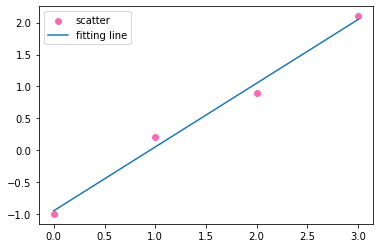

In [13]:
import matplotlib.pyplot as plt
fitting=[]
for i in range(len(x)):
    fitting.append(x.item(i)*k+b)
plt.scatter(x,y,color = 'hotpink',label="scatter")
plt.plot(x,fitting,label='fitting line')
plt.legend()
plt.show()

**Fitting more general functions**
For the above sections, we only think about the single input feature.Well, in the real life, for a established target(for example, the house price), there are so many factors which can affect it(area,environment,height).So, we can think of the input features as a **NxD** matrix:
$$X=\begin{bmatrix}x^{(1)}_{1}&x^{(1)}_{2}\dots x^{(1)}_{D} \\x^{(2)}_{1}&x^{(2)}_{2}\dots x^{(2)}_{D}\\x^{(3)}_{1}&x^{(3)}_{2}\dots x^{(3)}_{D}\\ \vdots & & \\ x^{(N)}_{1} & x^{(N)}_{2} \dots x^{(N)}_{D}\end{bmatrix}$$

where for each row, there will be one type of feature $x^{(n)}$, still to put them into a linear function, we can still add an extra column of ones to this matrix:
$$X=\begin{bmatrix}x^{(1)}_{1}&x^{(1)}_{2}\dots x^{(1)}_{D}&1\\x^{(2)}_{1}&x^{(2)}_{2}\dots x^{(2)}_{D}& 1\\x^{(3)}_{1}&x^{(3)}_{2}\dots x^{(3)}_{D} &1 \\ \vdots & & \\ x^{(N)}_{1} & x^{(N)}_{2} \dots x^{(N)}_{D}&1\end{bmatrix}$$



**Polynomials**
We can also use linear regression to fit the polynomials. Let's say we take random values for each row of **X**:
$$\phi=\begin{bmatrix}1 & x^{(1)}&(x^{(1)})^{2}\dots (x^{(1)})^{K-1}\\1 & x^{(2)}&(x^{(2)})^{2}\dots (x^{(2)})^{K-1} \\ \vdots \\1 & x^{(N)}&(x^{(N)})^{2}\dots (x^{(N)})^{K-1}\end{bmatrix}$$.
And we have the weights matrix:
$$W=\begin{bmatrix}w^{(1)}\\w^{(2)}\\w^{(3)}\\ \vdots \\w_{k} \end{bmatrix}$$.
Then using $\phi$ as our design matrix, we can the fit the model:$$Y \approx f=w^{T}\phi(x)=w_{1}+w_{2}x+w_{3}x^{2}+w_{4}x^{3}+\dots+w_{k}x^{k-1}$$ and this equation is for each type of input feature。

**Multiple Linear Regression**


In [31]:
import random
import numpy as np
import pandas as pd
random.seed(88)
data_x = pd.DataFrame(
        {"a": random.sample(range(100), 10), "b": random.sample(range(100), 10), "c": random.sample(range(100), 10)})
data_y = pd.Series(random.sample(range(200), 10))
data_y.name = "y"

**Input features**
<br>
As we can see here, we have three different types of features for input

In [30]:
data_x

,a,b,c
0,50,87,41
1,24,59,85
2,42,17,55
3,23,28,17
4,80,15,39
5,1,88,20
6,67,77,15
7,98,22,59
8,89,56,43
9,43,52,7


**Target Output**

In [5]:
data_y

0     39
1     63
2    113
3     50
4     56
5     45
6      3
7     60
8    165
9    134
Name: y, dtype: int64

**Using np.linalg.lstsq()**
<br>
The first one is the **regression coefficient**, the second one is the **squared error for the residual sum**, the third one is the
rank of a matrix, and the fourth one is the **singluar value**.In this case, we only care about the coefficient.

In [8]:
res=np.linalg.lstsq(data_x,data_y,rcond=None)
res[0]

array([0.652101  , 0.27331666, 0.52302062])

**Fitting**

Now we can try to multiply the weights by the input features.


In [23]:
fitting=np.matmul(data_x,res[0].T)
fitting.values

array([ 77.82744443,  76.23285964,  60.80075928,  31.54253987,
        76.6656338 ,  35.16437921,  72.58145856, 100.77708079,
        95.83260815,  45.91395328])

**Plotting**


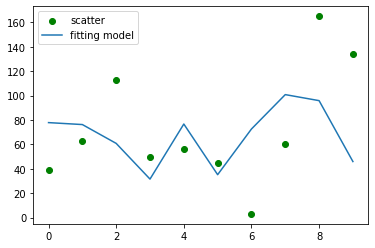

In [26]:
import matplotlib.pyplot as plt
lst=[i for i in range(10)]
plt.scatter(lst,data_y.values,color='green',label='scatter')
plt.plot(lst,fitting.values,label='fitting model')
plt.legend()
plt.show()

## Radcial Basis Function
